In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
df.shape

(13200, 7)

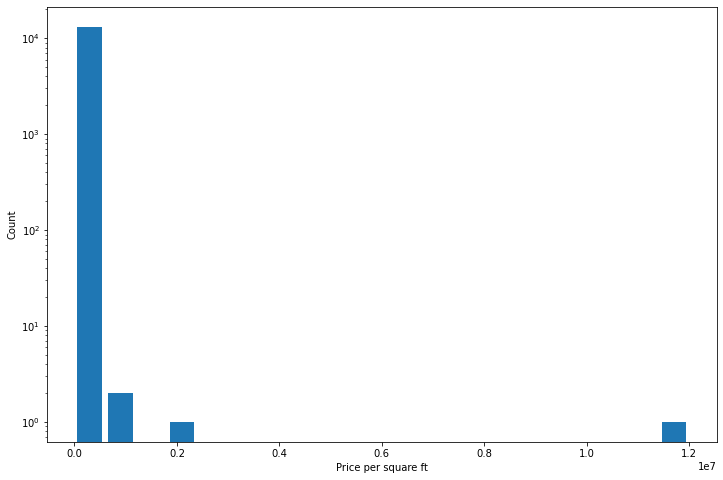

In [26]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

### Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [12]:
lower, upper = df.price_per_sqft.quantile([0.001, 0.999])
lower, upper

(1366.184, 50959.36200000099)

In [13]:
df_1 = df[(df.price_per_sqft > lower) & (df.price_per_sqft < upper)]
df_1.shape

(13172, 7)

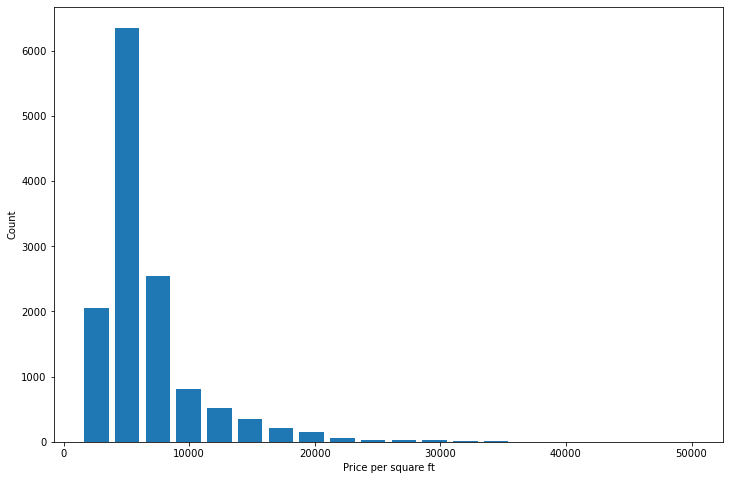

In [25]:
plt.hist(df_1.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

### Use 4 standard deviation to further remove outliers 

In [14]:
upper = df_1.price_per_sqft.mean() + 4*df_1.price_per_sqft.std()
lower = df_1.price_per_sqft.mean() - 4*df_1.price_per_sqft.std()
lower, upper

(-9900.429065502549, 23227.73653589429)

In [15]:
df_2 = df_1[(df_1.price_per_sqft > lower) & (df_1.price_per_sqft < upper)]
df_2.shape

(13047, 7)

In [17]:
df_2.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

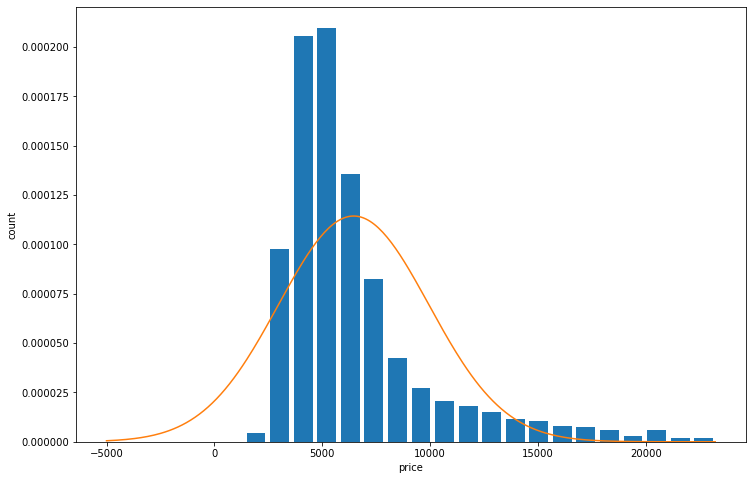

In [23]:
# Plot histogram for new dataframe that is generated. Also plot bell curve on same histogram
from scipy.stats import norm

plt.hist(df_2.price_per_sqft, bins=20, rwidth=0.8, density=True)
# density = True: each bin will display the bin's raw count divided
# by the total number of counts and the bin width
plt.xlabel('price')
plt.ylabel('count')

rng = np.arange(-5000, df_2.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df_2.price_per_sqft.mean(),df_2.price_per_sqft.std()))

### Now remove outliers using z score. Use z score of 4 as your thresold

In [29]:
df_2['z_score'] = (df_2.price_per_sqft - df_2.price_per_sqft.mean())/df_2.price_per_sqft.std()
df_2.head()

<ipython-input-29-19b7ee86453a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['z_score'] = (df_2.price_per_sqft - df_2.price_per_sqft.mean())/df_2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601


In [40]:
df_1.shape

(13172, 7)

In [36]:
df_3 = df_1[(df_2.z_score > -4) & (df_2.z_score < 4)]
df_3.shape

(12961, 8)

In [39]:
df_2.shape[0]-df_3.shape[0]

86